### HANDS-ON SESSION AGENDA:

Build and implement a Simple Linear Regression Model:

    1. Data preparation and Train-Test Splitting

    2. Linear Regression Model in a single independent variable (single attribute) [Simple Linear Regression]

    3. Simple Linear Regression Model with influential data points discarded

    4. Simple Linear Regression Model after Standardization



In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

## Business Problem

Ecommerce company based in a City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company aims to uncover the combination of factors that <b> consistently lead to higher yearly spending by customers. </b>


## About the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [15]:
%pip install plotly pandas seaborn numpy matplotlib scikit-learn scipy statsmodels

### Loading the required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
import os
import sklearn

In [5]:
# Load the dataset
customers = pd.read_csv('Ecommerce Customers.csv')

# Strip extra spaces from column names
customers.columns = customers.columns.str.strip()

# Explore the first few rows of the dataset
customers.head(4)

Email  \
0                   kyang@diaz.org   
1                 asilva@yahoo.com   
2              william82@gmail.com   
3  jeffrey54@mcdonald-williams.com   

                                            Address      Avatar  \
0  223 Love Trail Suite 831\nPort Jeffrey, IN 46849   OliveDrab   
1                        USNV Johnson\nFPO AP 19026       Wheat   
2        11143 Park Squares\nSamanthatown, UT 97073  SandyBrown   
3  297 Francis Valley\nSouth Lindsey, NY 13669-5367   Gainsboro   

  Avg. Session Length  Time on App Time on Website Length of Membership  \
0         34.37425805  15.12699429     37.15762409          5.377593584   
1         34.60331112  12.20729849     33.91384725          6.922689335   
2                   ?            #             NaN                  NaN   
3         34.96760989   13.9194944     37.95201319          5.066696864   

   Yearly Amount Spent  Gender  
0           765.518462  Female  
1           744.221867    Male  
2                  NaN    Male  
3           712.396327  Female

**Check the head of customers, and check out its info() and describe() methods.**

In [6]:
customers.shape # data points and # columns

(500, 9)

In [7]:
customers.info() # data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    object 
 4   Time on App           499 non-null    object 
 5   Time on Website       498 non-null    object 
 6   Length of Membership  498 non-null    object 
 7   Yearly Amount Spent   495 non-null    float64
 8   Gender                500 non-null    object 
dtypes: float64(1), object(8)
memory usage: 35.3+ KB


### Data Pre-processing :
####  Checking for missing data, NaNs, Nulls and special symbols like '?' or '#'

In [9]:
customers['Avg. Session Length'].value_counts()


Avg. Session Length
?              3
#              2
32.38473266    1
32.55949313    1
34.7093233     1
              ..
32.27459383    1
32.18984473    1
34.65548568    1
32.91278511    1
32.83694077    1
Name: count, Length: 497, dtype: int64

In [10]:
# Check for missing values, NaNs, Nulls and special symbols like '?'
missing_values_na_null_symbols = (customers.isnull() | customers.isin(['NULL', '?', 'NA', 'NaN', '#'])).sum()
missing_values_na_null_symbols

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     5
Time on App             4
Time on Website         6
Length of Membership    3
Yearly Amount Spent     5
Gender                  0
dtype: int64

In [11]:
non_zero_columns = missing_values_na_null_symbols[missing_values_na_null_symbols > 0].index.tolist()
non_zero_columns
# Display the result

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [12]:

customers[non_zero_columns] = customers[non_zero_columns].replace({'?': None, '#': None, 'NaN': None, 'NA': None, 'NULL': None})

# Convert columns to numeric, coercing invalid values to NaN
customers[non_zero_columns] = customers[non_zero_columns].apply(pd.to_numeric, errors='coerce')

# Fill NaN values in each column with the median of that column
for col in non_zero_columns:
    median_value = customers[col].median()  # Calculate the median for the column
    customers[col] = customers[col].fillna(median_value)  # Replace NaN values with the median

missing_values_na_null_symbols = (customers.isnull() | customers.isin(['NULL', '?', 'NA', 'NaN', '#'])).sum()
missing_values_na_null_symbols

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
Gender                  0
dtype: int64

In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
 8   Gender                500 non-null    object 
dtypes: float64(5), object(4)
memory usage: 35.3+ KB


In [15]:
import pandas as pd

def replace_missing_data(df, columns, special_symbols):
    # Replace special symbols with NaN
    df[columns] = df[columns].replace(special_symbols, None)
    # Convert columns to numeric, coercing invalid values to NaN
    df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
    # Fill NaN values in each column with the median of that column
    for col in columns:
        median_value = df[col].median()  # Calculate the median for the column
        df[col] = df[col].fillna(median_value)  # Replace NaN values with the median

    # Check for remaining missing values (NaN, special symbols)
    missing_values_summary = (df.isnull() | df.isin(special_symbols)).sum()
    return df, missing_values_summary



In [16]:
# Invoke the data imputation on the columns with missing data , like NaN, NULL or '?', '#' or other symbols

# You can also add more special symbols to the list depending on your use-case scenario
special_symbols = ['?', '#', '%', '$', 'NaN', 'NULL', 'NA', 'N/A']
customers, missing_summary = replace_missing_data(customers, non_zero_columns, special_symbols)
print(missing_summary)

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
Gender                  0
dtype: int64


In [17]:
# Cross Check for missing values, NaNs, Nulls and special symbols like '?'
missing_na_null_symbols = (customers.isnull() | customers.isin([special_symbols])).sum()
missing_na_null_symbols

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
Gender                  0
dtype: int64

In [18]:
customers.describe() # summary to understand the data, prints the summary only for numeric attributes by default

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.047641    12.043802        37.062006   
std               0.988353     0.988975         1.005088   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.358994   
50%              33.077731    11.975406        37.069367   
75%              33.705873    12.726862        37.697353   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.527447           547.348470  
std                0.979502          1098.741300  
min                0.269901           266.086341  
25%                2.934588           445.577927  
50%                3.532862           497.811930  
75%                4.118402           548.339872  
max                6.922689         25006.670580

In [19]:
customers.info() # To understand the data type for each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
 8   Gender                500 non-null    object 
dtypes: float64(5), object(4)
memory usage: 35.3+ KB


In [20]:
# include parameter specifies which data types should be included in the summary.
# 'O' stands for object data type in pandas, which typically includes strings or mixed data types.
customers.describe(include=['O'])

Email                                           Address  \
count              500                                               500   
unique             500                                               500   
top     kyang@diaz.org  223 Love Trail Suite 831\nPort Jeffrey, IN 46849   
freq                 1                                                 1   

       Avatar Gender  
count     500    500  
unique    138      2  
top      Teal   Male  
freq        7    260

### Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use Plotly to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [21]:
import plotly.express as px #importing plotly

In [22]:
customers_clean = customers.drop(columns = ['Email','Address','Avatar', 'Gender', 'Time on App', 'Time on Website', 'Avg. Session Length'],axis=1)
customers_clean.head()

Length of Membership  Yearly Amount Spent
0              5.377594           765.518462
1              6.922689           744.221867
2              3.532862           497.811930
3              5.066697           712.396327
4              5.705941           708.935185

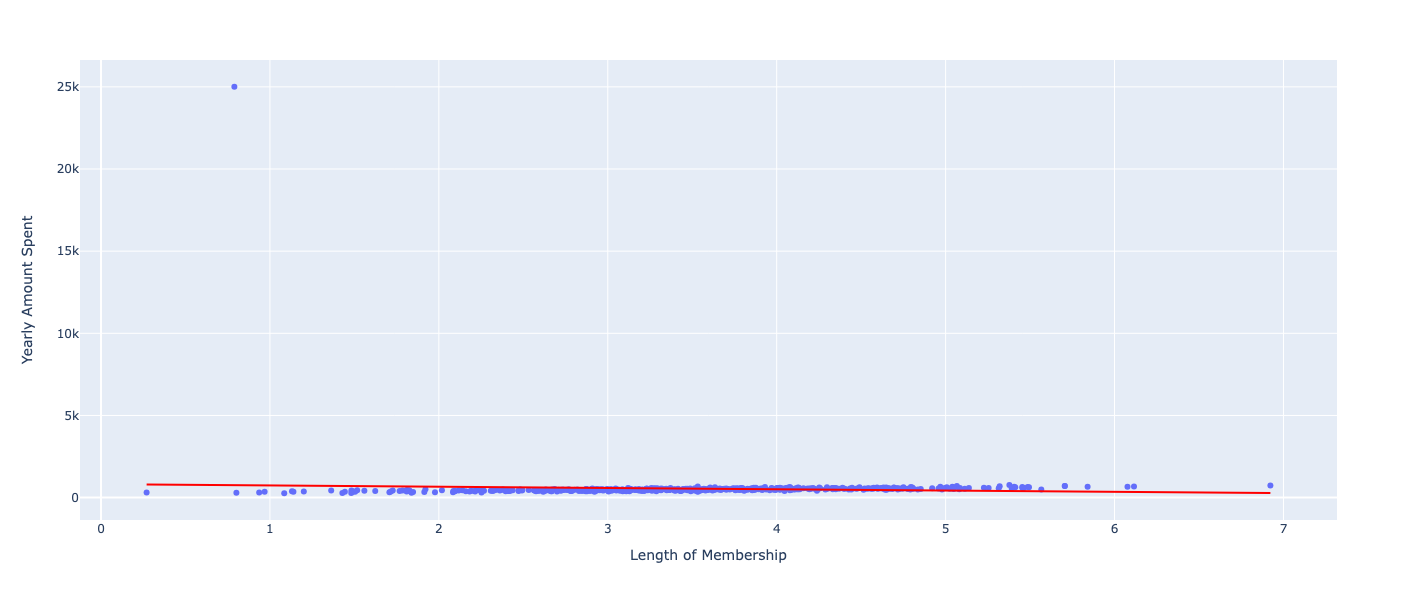

In [23]:
# Scatter plot of Length of Membership vs Yearly Amount Spent
fig_with_outliers = px.scatter(customers_clean, x="Length of Membership", y="Yearly Amount Spent", trendline="ols")

# Update the trendline color to red
fig_with_outliers.update_traces(line=dict(color='red'))

# Update the layout to resize the figure
fig_with_outliers.update_layout(
    width=900,  # Width in pixels (10 inches * 100 pixels per inch)
    height=600   # Height in pixels (6 inches * 100 pixels per inch)
)
fig_with_outliers.show() #plotting scatter plot with "Avg. Session Length","Time on App"

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

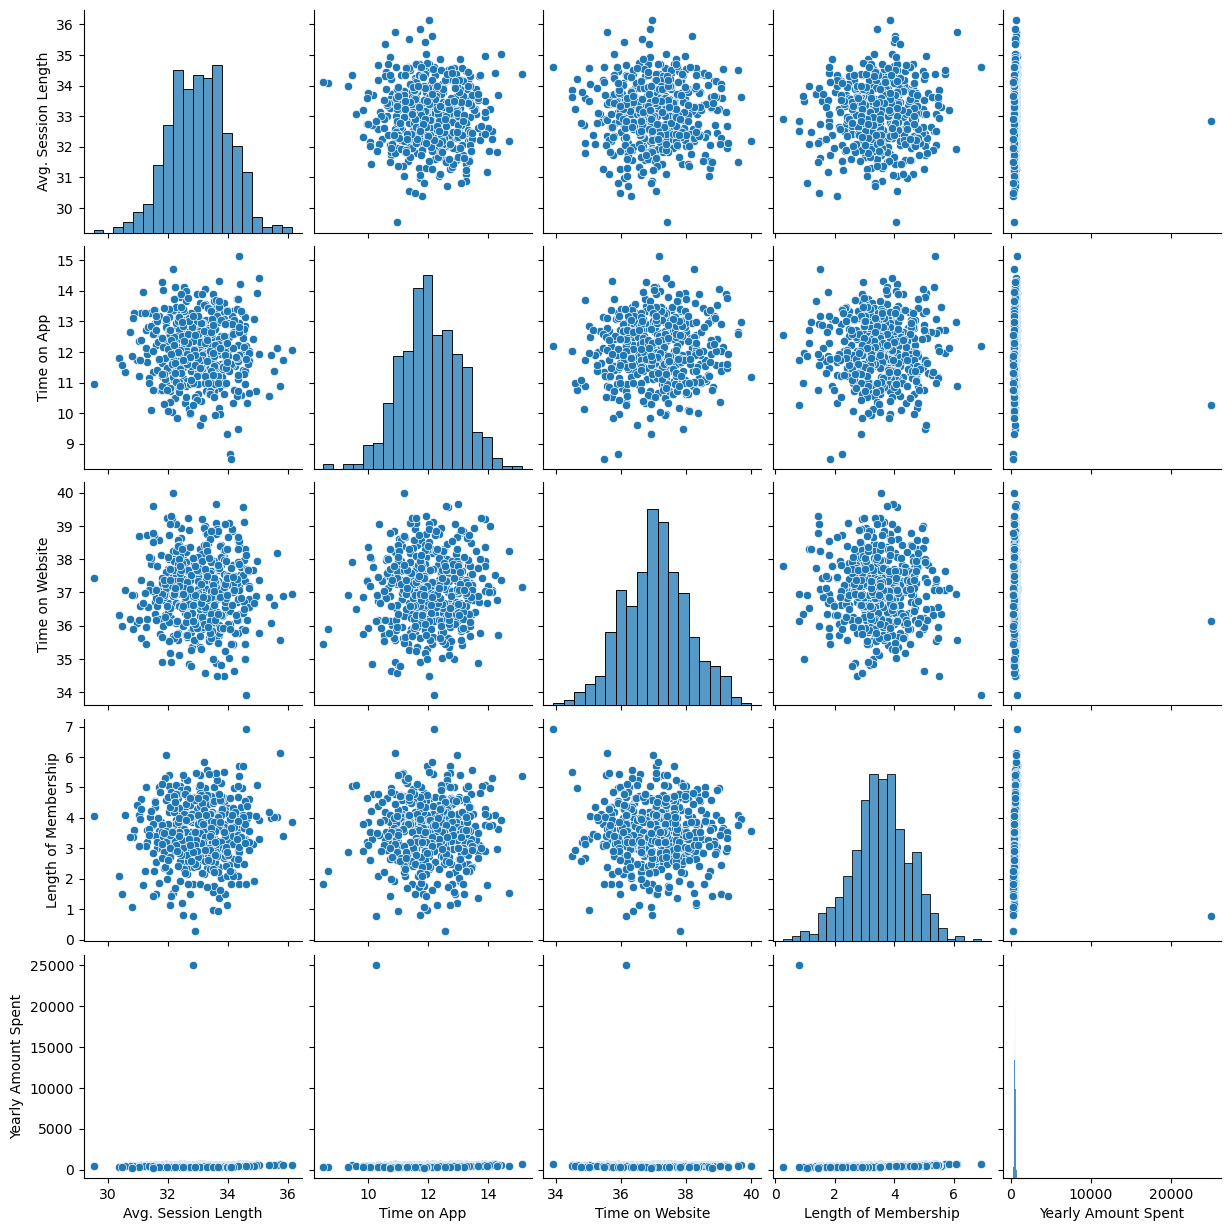

In [24]:
sns.pairplot(customers) #pair plot - customers contains numerical columns only

In [25]:
customers_numeric_cols = customers.select_dtypes(include=['float64'])

<Axes: >

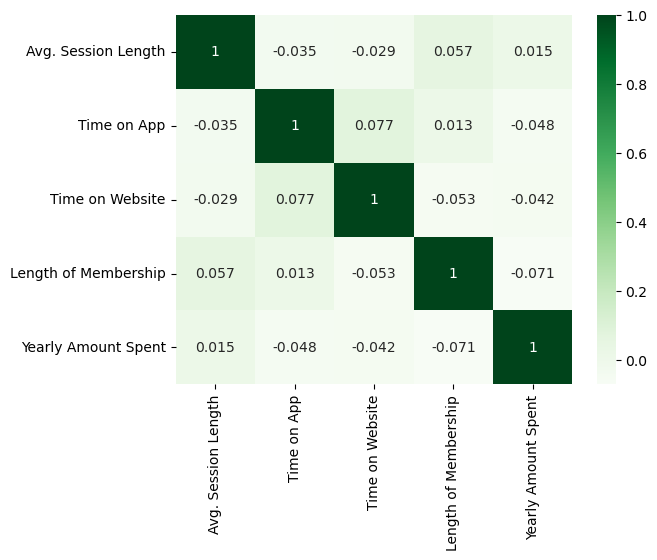

In [26]:
sns.heatmap(customers_numeric_cols.corr(),annot=True,cmap='Greens') #correlation plot

**Based on this plot what looks to be the most correlated feature with Yearly Amount Spent?**
Lenght of Membership with negative correlation -0.071

### Data Preparation for model building

##### Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Set a variable **X** equal to a single numerical feature namely **'Length of Membership'** and the target variable **'y'** equal to the "Yearly Amount Spent" column.

In [27]:
customers.head() #snapshot of clean data

Email  \
0                   kyang@diaz.org   
1                 asilva@yahoo.com   
2              william82@gmail.com   
3  jeffrey54@mcdonald-williams.com   
4               rhonda01@gmail.com   

                                            Address      Avatar  \
0  223 Love Trail Suite 831\nPort Jeffrey, IN 46849   OliveDrab   
1                        USNV Johnson\nFPO AP 19026       Wheat   
2        11143 Park Squares\nSamanthatown, UT 97073  SandyBrown   
3  297 Francis Valley\nSouth Lindsey, NY 13669-5367   Gainsboro   
4         939 Watson Run\nStaceyberg, VT 58376-0454      Orchid   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.374258    15.126994        37.157624              5.377594   
1            34.603311    12.207298        33.913847              6.922689   
2            33.077731    11.975406        37.069367              3.532862   
3            34.967610    13.919494        37.952013              5.066697   
4            34.385820    12.729720        37.069367              5.705941   

   Yearly Amount Spent  Gender  
0           765.518462  Female  
1           744.221867    Male  
2           497.811930    Male  
3           712.396327  Female  
4           708.935185  Female

In [28]:
customers.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
 8   Gender                500 non-null    object 
dtypes: float64(5), object(4)
memory usage: 35.3+ KB


In [31]:
X = customers_clean.drop(['Yearly Amount Spent'],axis=1) #independent attributes
X.head(2)

Length of Membership
0              5.377594
1              6.922689

In [32]:
y = customers_clean['Yearly Amount Spent'] #dependent attributes
y.head(2)

0    765.518462
1    744.221867
Name: Yearly Amount Spent, dtype: float64

In [33]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # importing neccessary modules

### Spilit the data into Training and Testing Data

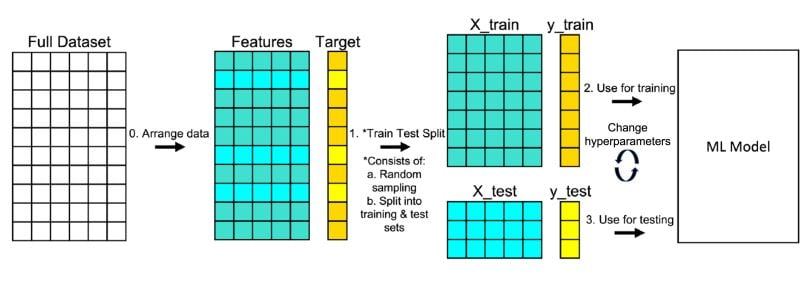

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #train test split
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((400, 1), (400,), (100, 1), (100,))

In [41]:
# adding the Constant term
X_train= sm.add_constant(X_train)
X_train.head()

X_test= sm.add_constant(X_test)
X_test.head()

const  Length of Membership
18     1.0              5.453969
361    1.0              3.201802
104    1.0              2.909008
4      1.0              5.705941
156    1.0              3.768562

In [42]:
y_train[:5] #snapshot of Y train

161    534.771485
72     578.241605
246    501.209173
230    505.771140
391    439.891280
Name: Yearly Amount Spent, dtype: float64

In [43]:
# checkl whether there are any missing values in the training set, likewise can also be checked for test set
any_missing = X_train.isnull().values.any()
any_missing

False

## Training the Model

Now its time to train a linear regression model on our training data!



`## Simple Linear Regression model`

In [45]:
model = sm.OLS(y_train, X_train) # OLS model trained on 'const','Length of Membership' and 'Yearly Amount Spent'
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.008
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     3.036
Date:                 Thu, 12 Sep 2024   Prob (F-statistic):             0.0822
Time:                         15:37:02   Log-Likelihood:                -3410.8
No. Observations:                  400   AIC:                             6826.
Df Residuals:                      398   BIC:                             6834.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

![image.png](attachment:image.png)

In [46]:
results_df = pd.DataFrame({
    'Fitted Values': results.fittedvalues,  # Fitted values from the model
    'Predicted Values': results.predict(),   # Predicted values
    'Residuals': results.resid,             # Residuals (errors) from the model
})

coefficients_df = pd.DataFrame({
    'Coefficients': results.params,         # Model coefficients
    'Standard Errors': results.bse,         # Standard errors of the coefficients
    'p-values': results.pvalues,            # p-values for the coefficients
    't-values': results.tvalues             # t-statistics for the coefficients
})


In [47]:
results_df.head()

Fitted Values  Predicted Values   Residuals
161     561.956754        561.956754  -27.185269
72      584.860059        584.860059   -6.618454
246     544.603575        544.603575  -43.394402
230     575.495871        575.495871  -69.724731
391     680.905142        680.905142 -241.013861

In [48]:
coefficients_df

Coefficients  Standard Errors  p-values  t-values
const                   933.708077       223.968564  0.000038  4.168925
Length of Membership   -107.070574        61.449124  0.082206 -1.742426

# Errors metrics to evaluate the model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [49]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#defining MAPE

In [50]:
from sklearn import metrics
import numpy as np

scores=pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test','R2'])

def mean_absolute_percentage_error(y_true, y_pred):
    # Calculate Mean Absolute Percentage Error (MAPE)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def get_metrics(y_train, y_train_pred, y_test, y_test_pred, model_name, scores):
    # Calculate metrics
    MAE_Train = metrics.mean_absolute_error(y_train, y_train_pred)
    MSE_Train = metrics.mean_squared_error(y_train, y_train_pred)
    RMSE_Train = np.sqrt(MSE_Train)
    MAPE_Train = mean_absolute_percentage_error(y_train, y_train_pred)

    MAE_Test = metrics.mean_absolute_error(y_test, y_test_pred)
    MSE_Test = metrics.mean_squared_error(y_test, y_test_pred)
    RMSE_Test = np.sqrt(MSE_Test)
    MAPE_Test = mean_absolute_percentage_error(y_test, y_test_pred)

    R2 = metrics.r2_score(y_train, y_train_pred)

    # Create a DataFrame with new metrics
    new_metrics = pd.DataFrame({
        'Model': [model_name],
        'MAE_Train': [MAE_Train],
        'MSE_Train': [MSE_Train],
        'RMSE_Train': [RMSE_Train],
        'MAPE_Train': [MAPE_Train],
        'MAE_Test': [MAE_Test],
        'MSE_Test': [MSE_Test],
        'RMSE_Test': [RMSE_Test],
        'MAPE_Test': [MAPE_Test],
        'R2': [R2]
    })
    # Update scores DataFrame
    scores = new_metrics
    return scores

# Coefficients

In [51]:
#definition of coefficient function
def coeff(model_title,modelparams):
    tempdf=pd.DataFrame(modelparams)
    tempdf.rename(columns = {0:model_title},inplace = True)
    DF=pd.concat([coefficients,tempdf],axis=1)
    return(DF)

In [52]:
#get coefficients
coefficients=pd.DataFrame(results.params)
coefficients.rename(columns = {0:"Simple_Linear_Regression"},inplace = True)
coefficients

Simple_Linear_Regression
const                               933.708077
Length of Membership               -107.070574

In [53]:
#Get error metrics
scores = get_metrics(y_train,results.predict(X_train[['const','Length of Membership']]),y_test,
                     results.predict(X_test[['const','Length of Membership']]),"Simple_Linear_Regression",scores)
scores

Model   MAE_Train     MSE_Train  RMSE_Train  MAPE_Train  \
0  Simple_Linear_Regression  205.397756  1.492664e+06  1221.74626    32.38977   

     MAE_Test      MSE_Test   RMSE_Test  MAPE_Test        R2  
0  126.830032  27432.983292  165.629053  27.523445  0.007571

### Check for Linearity, Homoscedasticity, Independence of residuals


In [54]:
from scipy import stats
#definition of residual plots function
def residual_plots(results):
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    from statsmodels.nonparametric.smoothers_lowess import lowess
    from scipy import stats
    import statsmodels.api as sm


    fig, ax = plt.subplots(2,2,figsize=(14,10))
    ########## Residuals vs fitted  ##########
    residuals = results.resid
    fitted = results.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 10})
    plt.rcParams["figure.figsize"] = (8,7)

    ax[0,0].scatter(fitted, residuals, edgecolors = 'k', facecolors = (0, 0, 1, 0.5))
    ax[0,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[0,0].set_ylabel('Residuals')
    ax[0,0].set_xlabel('Fitted Values (Predicted Values)')
    ax[0,0].set_title('Residuals vs. Fitted')
    ax[0,0].plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax[0,0].annotate(i,xy=(fitted[i],residuals[i]))

    #plt.show()


    ######### Normal qq plot ###########
    sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    sorted_student_residuals.index = results.resid.index
    sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
    df = pd.DataFrame(sorted_student_residuals)
    df.columns = ['sorted_student_residuals']
    df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
    rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
    top3 = rankings[:3]

    #fig, ax = plt.subplots()
    x = df['theoretical_quantiles']
    y = df['sorted_student_residuals']
    ax[0,1].scatter(x,y, edgecolor = 'k',facecolor = (0, 0, 1, 0.5))
    ax[0,1].set_title('Normal Q-Q')
    ax[0,1].set_ylabel('Standardized Residuals')
    ax[0,1].set_xlabel('Theoretical Quantiles')
    ax[0,1].plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
    for val in top3.index:
        ax[0,1].annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
    #plt.show()


    ######### Homoscedasticity ############
    student_residuals = results.get_influence().resid_studentized_internal
    sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
    sqrt_student_residuals.index = results.resid.index
    smoothed = lowess(sqrt_student_residuals,fitted)
    top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

    #fig, ax = plt.subplots()
    ax[1,0].scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = (0, 0, 1, 0.5))
    ax[1,0].plot(smoothed[:,0],smoothed[:,1],color = 'r', label='LOESS Smoothing Line (Trend Line)')
    ax[1,0].set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
    ax[1,0].set_xlabel('Fitted Values (Predicted Values)')
    ax[1,0].set_title('Scale-Location/Spread-Location (Constant Variance of Residuals)')
    ax[1,0].set_ylim(0,max(sqrt_student_residuals)+0.1)
    for i in top3.index:
        ax[1,0].annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
    #plt.show()


    ######### Cooks distance  ###########
    student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    student_residuals.index = results.resid.index
    df = pd.DataFrame(student_residuals)
    df.columns = ['student_residuals']
    df['leverage'] = results.get_influence().hat_matrix_diag
    smoothed = lowess(df['student_residuals'],df['leverage'])
    sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
    top3 = sorted_student_residuals[:3]

    #fig, ax = plt.subplots()
    x = df['leverage']
    y = df['student_residuals']
    xpos = max(x)+max(x)*0.01
    ax[1,1].scatter(x, y, edgecolors = 'k', facecolors = (0, 0, 1, 0.5))
    ax[1,1].plot(smoothed[:,0],smoothed[:,1],color = 'b')
    ax[1,1].set_ylabel('Studentized Residuals')
    ax[1,1].set_xlabel('Leverage')
    ax[1,1].set_title('Residuals vs. Leverage')
    ax[1,1].set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
    ax[1,1].set_xlim(-0.01,max(x)+max(x)*0.05)
    plt.tight_layout()
    for val in top3.index:
        ax[1,1].annotate(val,xy=(x.loc[val],y.loc[val]))

    cooksx = np.linspace(min(x), xpos, 50)
    p = len(results.params)
    poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
    poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
    negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
    negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

    ax[1,1].plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
    ax[1,1].plot(cooksx,poscooks05y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks1y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks05y, ls = ':', color = 'r')
    ax[1,1].plot([0,0],ax[1,1].get_ylim(), ls=":", alpha = .3, color = 'k')
    ax[1,1].plot(ax[1,1].get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
    ax[1,1].annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
    ax[1,1].annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
    ax[1,1].legend()
    plt.show()

## Residuals - QQ, Cook's distance plots

Let's explore the residuals to investigate our regression results (predictions).

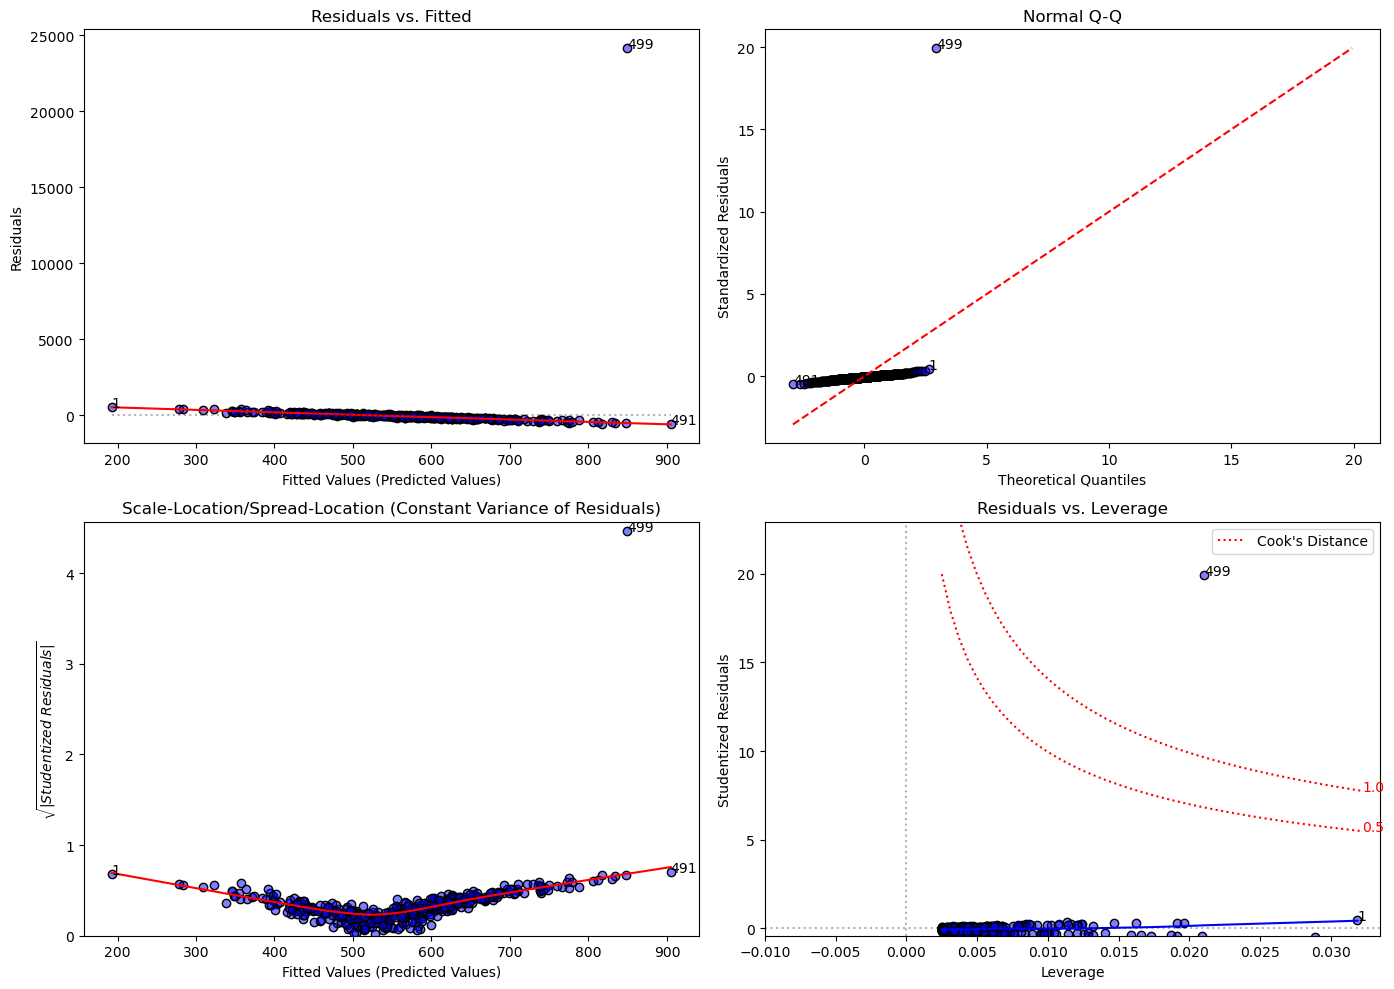

In [55]:

residual_plots(results)

# Residuals vs Fitted plot analyis: The residuals should be randomly scattered around the centerline of 0.
# Linearity: Residuals spread randomly across the range of fitted values without a clear pattern,
#            indicating that the model is likely linear.
# Homoscedasticity: Residuals have a relatively constant spread across the fitted values, with no evident "fanning" pattern.
#                   This suggests that the model does not have severe issues with heteroscedasticity.
# Independence of Errors: Residuals appear to be randomly scattered around the horizontal axis (at 0)
#                         with no discernible pattern or systematic trend, indicating that the residuals may be independent.
#                         No Clustering: There is no visible grouping or correlation between the residuals and fitted values.
#                         If there were patterns like a funnel shape, waves, or clustering, it would suggest a violation of independence.


# Q-Q plot analysis:
# Overprediction: Points in the tails of the Q-Q plot will deviate from the reference line.
# In the left tail, points are above the line, and in the right tail, points are below the line.
# Underprediction: Points in the tails will also deviate from the reference line, but in the opposite manner.
# In the left tail, points are below the line, and in the right tail, points are above the line.

# Homescedasticity/Heteroscedasticity:
# Plot shows "U-shaped" pattern, where residuals start higher on the left, decrease in the middle, and increase again on the right.
# This pattern indicates HETEROSCEDASTICITY, meaning the variance of the residuals is not constant across the range of fitted values.
# FOR HOMOSCEDASTICITY, The residuals are spread evenly across the range of fitted (predicted) values, with no clear pattern
# (i.e., the residuals should not fan out or funnel as you move along the x-axis).

# RESIDUALS VS LEVERAGE:
# Outliers: The point with a very large studentized residual is a likely outlier.
# Leverage: There aren’t any extreme leverage points, suggesting that most data points are not far from the mean of the independent variables.
# Influential points: The point near the Cook’s Distance contour of 1 (possibly 499) is potentially influential
# and may be unduly affecting the model.



### Cook’s Distance Value Interpretation:

#### Cook's Distance tells you how much impact removing a data point (having high Cooks Dist) would have on the regression model by considering both leverage and residuals.ook's Distance flags the most influential data points in a regression model.

    D < 0.5	The data point is not influential on the model. Changes in this point will have minimal effect on the regression coefficients.
    D ≈ 0.5	The data point starts to have some influence on the model. It may be worth investigating further, though it's not necessarily problematic.
    D > 1	The data point is highly influential. It suggests that this point may significantly impact the model's coefficients, and its removal or further analysis is often recommended.

## Influential points

In [56]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [57]:
# Get the influence statistics for the model such as Cook's distance, leverage, DFFITS, Studentized residuals, etc.
influence_points = OLSInfluence(results) # results is output from the lm model built earlier

pd.DataFrame(influence_points.influence).describe()

0
count  400.000000
mean     0.976466
std     26.111077
min    -17.542869
25%     -0.566623
50%     -0.170799
75%      0.214975
max    520.013647

In [58]:
influence_points.influence[influence_points.influence>=1], len(influence_points.influence[influence_points.influence>=1])

(53       1.583863
 51       1.605331
 15       7.294938
 13       2.284210
 17       3.704267
 9        7.832789
 60       2.932987
 171      1.185491
 74       1.076103
 73       1.435348
 119      1.171174
 35       1.000415
 37       1.089702
 34       1.315730
 1       18.171627
 25       1.899369
 22       1.333216
 6        2.139384
 50       1.946566
 54       2.270362
 26       3.222262
 96       2.156156
 84       1.263610
 61       1.743070
 499    520.013647
 21       3.674241
 149      1.196761
 46       1.003580
 3        2.796558
 28       1.069798
 10       2.101929
 0        4.665947
 7        3.544861
 111      2.309408
 5        5.630509
 40       2.319924
 63       2.862195
 11       5.860005
 dtype: float64,
 38)

In [59]:
# Removal of influence points using influence value
influence_data_points = pd.DataFrame(influence_points.influence[influence_points.influence>=1])
customers_clean['influence_value']= influence_points.influence
customers_clean.loc[influence_data_points.index,].sort_values(['influence_value'], ascending = False).head(15)


Length of Membership  Yearly Amount Spent  influence_value
499              0.789520         25006.670580       520.013647
1                6.922689           744.221867        18.171627
9                6.115199           669.987141         7.832789
15               6.076654           657.019924         7.294938
11               5.840506           663.803693         5.860005
5                5.705154           700.917092         5.630509
0                5.377594           765.518462         4.665947
17               5.485977           642.101579         3.704267
21               5.493507           637.102448         3.674241
7                5.320094           689.235700         3.544861
26               5.412358           627.603319         3.222262
60               5.462501           587.574800         2.932987
63               5.454463           584.218314         2.862195
3                5.066697           712.396327         2.796558
40               5.226688           604.841319         2.319924

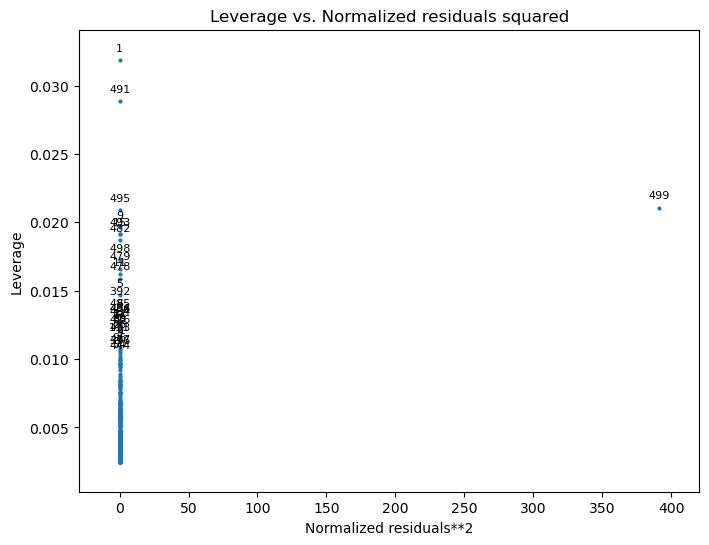

In [60]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(results, ax=ax)

# Customize marker size
for line in ax.get_lines():
    line.set_markersize(2)  # Reduce marker size

# Customize annotation font size
for text in ax.texts:
    text.set_fontsize(8)  # Reduce annotation font size

plt.show()


In [61]:
customers_clean.loc[[0, 1, 491, 499]] #looking at Influential points

Length of Membership  Yearly Amount Spent  influence_value
0                5.377594           765.518462         4.665947
1                6.922689           744.221867        18.171627
491              0.269901           314.438518       -17.542869
499              0.789520         25006.670580       520.013647

In [62]:
#removal of influential points based on above plot
# customers_clean=customers_clean.drop([0, 1, 491, 499])

# Drop all rows in 'customers_clean' where the influence value is >= 1
customers_clean = customers_clean.drop(influence_data_points.index)
# Drop the influence value column for plotting


In [63]:
customers_clean = customers_clean.drop('influence_value', axis=1)
customers_clean.shape

(462, 2)

In [64]:
customers_clean.head()

Length of Membership  Yearly Amount Spent
2               3.532862           497.811930
4               5.705941           708.935185
8               3.532862           684.163431
12              5.405406           663.074818
14              4.978476           497.811930

In [65]:
customers_clean[['Yearly Amount Spent', 'Length of Membership']].describe()

Yearly Amount Spent  Length of Membership
count           462.000000            462.000000
mean            488.780308              3.396624
std              70.040541              0.868313
min             266.086341              0.269901
25%             443.258381              2.907573
50%             492.775533              3.459266
75%             537.104264              4.007095
max             708.935185              5.705941

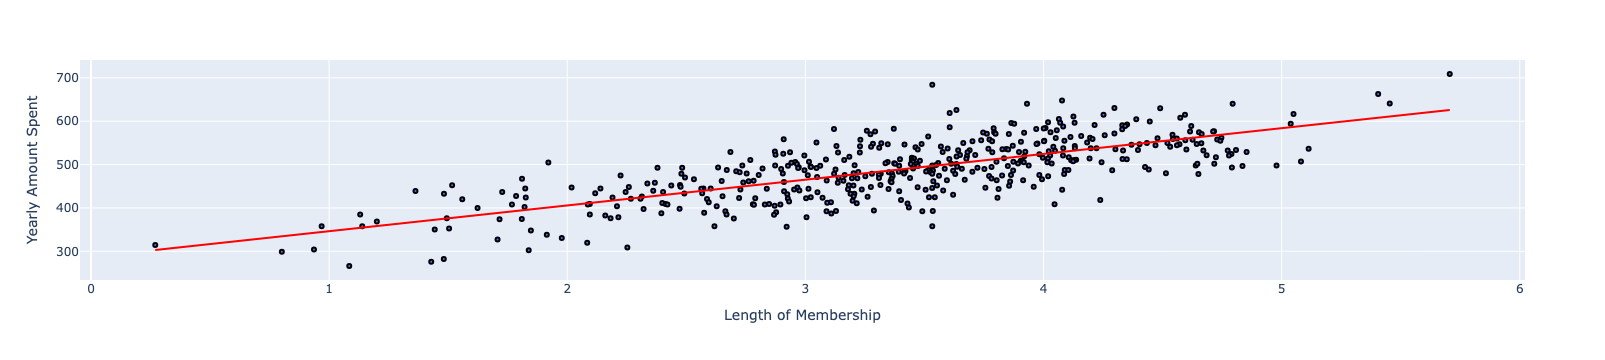

In [66]:
# Plot the scatterplot without the influential points

fig_without_outliers = px.scatter(customers_clean, x="Length of Membership", y="Yearly Amount Spent",trendline="ols")

# Update the marker size, add a black outline, and set the marker shape to square
fig_without_outliers.update_traces(marker=dict(symbol="circle",
                                               size=4,  # Set marker size
                                               line=dict(width=2, color='black')  # Black outline
                                              ))

# Update the trendline color to red
fig_without_outliers.update_traces(line=dict(color='red'))
fig_without_outliers.show() #plot sactter plot between "Length of Membership","Yearly Amount Spent"

#### Plotting linear model plot (using plotly's scatter) of Yearly Amount Spent vs. Length of Membership before and after removal of outliers

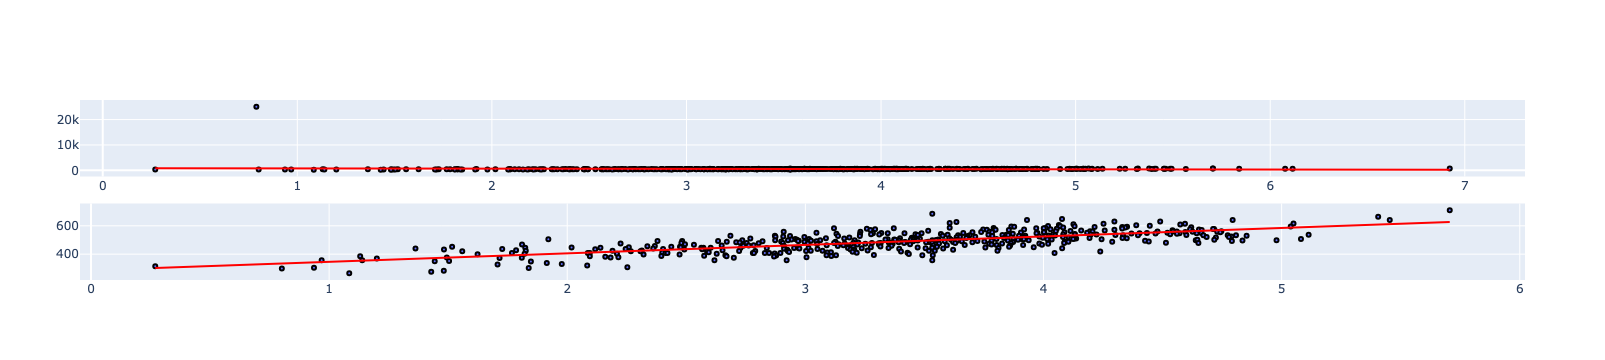

In [67]:

from plotly.subplots import make_subplots

figures = [
            fig_with_outliers,
            fig_without_outliers
    ]

fig = make_subplots(rows=len(figures), cols=1)



for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)
        # Update the marker size, add a black outline, and set the marker shape to square
        fig.update_traces(marker=dict(symbol="circle",
                                               size=4,  # Set marker size
                                               line=dict(width=2, color='black')  # Black outline
                                              ))

fig.show()

### Re-evaluate the linear regression model on the dataset excluding the influential data points

In [68]:
X = customers_clean.drop([],axis=1) #independent attributes
X.head(2)

Length of Membership  Yearly Amount Spent
2              3.532862           497.811930
4              5.705941           708.935185

In [69]:
X.shape

(462, 2)

In [70]:
y = customers_clean['Yearly Amount Spent'] #dependent attributes
y.head(2)

2    497.811930
4    708.935185
Name: Yearly Amount Spent, dtype: float64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((369, 2), (93, 2), (369,), (93,))

In [72]:
# y_train = np.array(y_train).reshape(-1,1)
# y_test = np.array(y_test).reshape(-1,1)
# y_train.shape, y_test.shape

In [73]:
# adding the Constant term
X_train= sm.add_constant(X_train)
X_train.head()

X_test= sm.add_constant(X_test)
X_test.head()

const  Length of Membership  Yearly Amount Spent
212    1.0              4.349778           512.165866
341    1.0              3.803365           463.745981
487    1.0              1.914090           338.319863
382    1.0              3.349245           443.441860
39     1.0              4.064549           605.061039

In [74]:
X_train.columns  #get columns of X train

Index(['const', 'Length of Membership', 'Yearly Amount Spent'], dtype='object')

In [75]:
reg_without_influencers = sm.OLS(y_train, X_train[['const', 'Length of Membership']]).fit()

print(reg_without_influencers.summary())  #build a regression model

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.538
Model:                             OLS   Adj. R-squared:                  0.536
Method:                  Least Squares   F-statistic:                     426.9
Date:                 Thu, 12 Sep 2024   Prob (F-statistic):           1.84e-63
Time:                         16:10:37   Log-Likelihood:                -1939.9
No. Observations:                  369   AIC:                             3884.
Df Residuals:                      367   BIC:                             3892.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [76]:
X_train.columns, X_test.columns

(Index(['const', 'Length of Membership', 'Yearly Amount Spent'], dtype='object'),
 Index(['const', 'Length of Membership', 'Yearly Amount Spent'], dtype='object'))

In [77]:
X_train.shape, X_test.shape

((369, 3), (93, 3))

In [78]:
#get error metrics
X_train_selected = X_train[['const', 'Length of Membership']]  # The same columns used to train the model
X_test_selected = X_test[['const', 'Length of Membership']]    # Same columns for the test set

scores = get_metrics(y_train,reg_without_influencers.predict(X_train_selected),y_test,reg_without_influencers.predict(X_test_selected),"LR_without_outliers",scores)
scores

Model  MAE_Train    MSE_Train  RMSE_Train  MAPE_Train  \
0  LR_without_outliers  37.414323  2157.186487   46.445522    7.897398   

    MAE_Test     MSE_Test  RMSE_Test  MAPE_Test        R2  
0  38.466369  2621.860508  51.204106   8.047563  0.537711

In [79]:
#get coefficients
coefficients2=coeff("LR_without_outliers",reg_without_influencers.params)
coefficients2

Simple_Linear_Regression  LR_without_outliers
const                               933.708077           287.907112
Length of Membership               -107.070574            58.505237

```Python
                   Model	   MAE_Train	     MSE_Train	     RMSE_Train	 MAPE_Train	    MAE_Test	    MSE_Test	RMSE_Test	     MAPE_Test	     R2
Simple_Linear_Regression	  205.397756	  1.492664e+06	     1221.74626	   32.38977	  126.830032	27432.983292	165.629053	     27.523445	  0.007571
LR_without_outliers	           37.414323	   2157.186487	      46.445522	   7.897398	   38.466369	 2621.860508	51.204106	      8.047563	  0.537711
```

In [80]:
from scipy import stats

## Standardizing the data



In [81]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler() #importing Scaler

In [82]:
num_vars = 'Length of Membership' #defining Numerical variable

In [83]:
X = customers_clean.drop(['Yearly Amount Spent'],axis=1)
y = customers_clean['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #train test split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((369, 1), (369,), (93, 1), (93,))

In [84]:
X_train.head() #snapshot of X train

Length of Membership
82               3.746573
14               4.978476
469              2.868428
97               4.746990
243              3.467014

In [85]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[[num_vars]])
X_test[num_vars] = scaler.transform(X_test[[num_vars]])

print(X_train.head())
#Scaling

     Length of Membership
82               0.360169
14               1.799000
469             -0.665482
97               1.528631
243              0.033652


In [86]:
# adding the Constant term
X_train = sm.add_constant(X_train)
print(X_train.head())

X_test = sm.add_constant(X_test)
#X_test.head()

     const  Length of Membership
82     1.0              0.360169
14     1.0              1.799000
469    1.0             -0.665482
97     1.0              1.528631
243    1.0              0.033652


In [87]:
y_train[:5] #snapshot of Y train

82     573.847438
14     497.811930
469    384.326057
97     562.082045
243    501.928265
Name: Yearly Amount Spent, dtype: float64

In [88]:
X_train[:5] #snapshot of X train

const  Length of Membership
82     1.0              0.360169
14     1.0              1.799000
469    1.0             -0.665482
97     1.0              1.528631
243    1.0              0.033652

In [89]:
reg_without_influencers_stdScaler= sm.OLS(y_train, X_train).fit()
print(reg_without_influencers_stdScaler.summary()) #build a regression model

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.538
Model:                             OLS   Adj. R-squared:                  0.536
Method:                  Least Squares   F-statistic:                     426.9
Date:                 Thu, 12 Sep 2024   Prob (F-statistic):           1.84e-63
Time:                         16:13:29   Log-Likelihood:                -1939.9
No. Observations:                  369   AIC:                             3884.
Df Residuals:                      367   BIC:                             3892.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

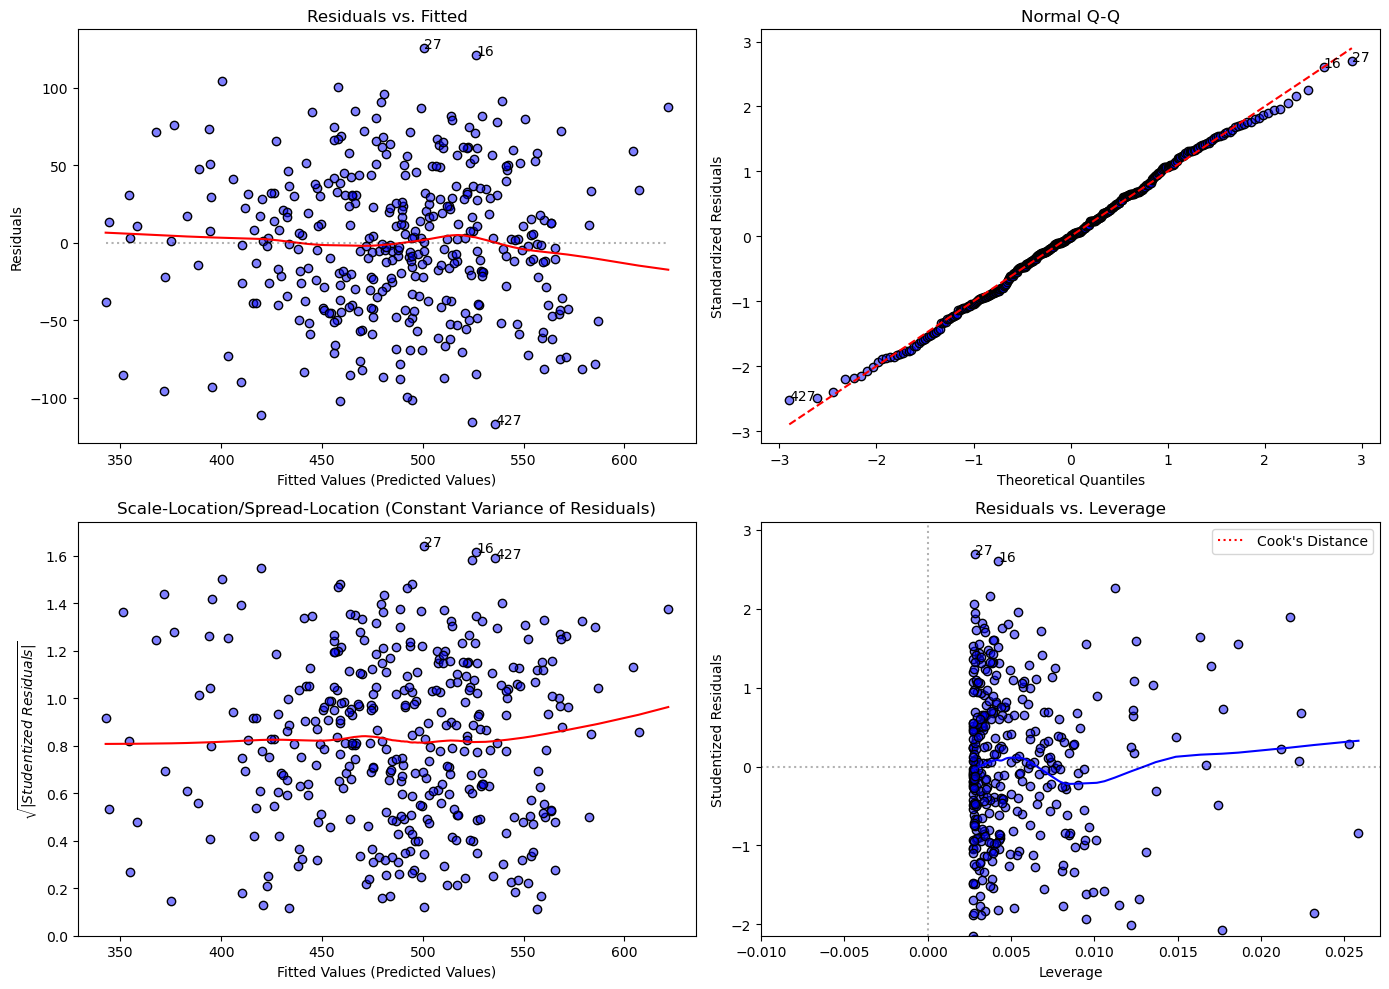

In [90]:
residual_plots(reg_without_influencers_stdScaler) #Get residual plots

In [91]:
#get error metrics
scores = get_metrics(y_train,reg_without_influencers_stdScaler.predict( X_train),y_test,reg_without_influencers_stdScaler.predict(X_test),"LR_after_standardization (without outliers)",scores)
scores

Model  MAE_Train    MSE_Train  \
0  LR_after_standardization (without outliers)  37.414323  2157.186487   

   RMSE_Train  MAPE_Train   MAE_Test     MSE_Test  RMSE_Test  MAPE_Test  \
0   46.445522    7.897398  38.466369  2621.860508  51.204106   8.047563   

         R2  
0  0.537711

In [92]:
#get coefficients
coefficients=coeff("LR_after_standardization",reg_without_influencers_stdScaler.params)
coefficients

Simple_Linear_Regression  LR_after_standardization
const                               933.708077                489.059946
Length of Membership               -107.070574                 50.091190

<small>

| Model                  | MAE_Train     | MSE_Train      | RMSE_Train  | MAPE_Train  | MAE_Test    | MSE_Test    | RMSE_Test   | MAPE_Test   | R2        |
|------------------------|---------------|----------------|-------------|-------------|-------------|-------------|-------------|-------------|-----------|
| Simple_Linear_Regression| 205.397756    | 1.492664e+06   | 1221.74626  | 32.38977    | 126.830032  | 27432.983292| 165.629053  | 27.523445   | 0.007571  |
| LR_without_outliers     | 37.414323     | 2157.186487    | 46.445522   | 7.897398    | 38.466369   | 2621.860508 | 51.204106   | 8.047563    | 0.537711  |
| LR_Std (without outliers)| 37.414323    | 2157.186487    | 46.445522   | 7.897398    | 38.466369   | 2621.860508 | 51.204106   | 8.047563    | 0.537711  |

</small>


#### Data Transformations: sqrt(X) and log(X)
##### Square root (sqrt(x)) and logarithmic (log(x)) data transformations are commonly used in regression to help meet assumptions of linearity, homoscedasticity, and normality of residuals, which can improve model performance.

#### When to Apply Transformations:
- Square Root Transformation (sqrt(x)): Often used when data is skewed, particularly when the variable has values close to zero and no negative values

- Logarithmic Transformation (log(x)): Commonly used for highly skewed data, especially when the variable has a long right tail. It can handle
only positive values and is useful when the relationship between variables is multiplicative rather than additive.

Perform log transformations on the data:

In [92]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Assume X_train and y are already defined as your predictor and response variables.
# Ensure that X_train and y have the same number of rows

# Step 1: Data Transformation (Choose square root)
# Apply the square root transformation
X_sqrt_train = np.sqrt(X_train)
X_sqrt_test= np.sqrt(X_test)

# Ensure X_sqrt_train and y are NumPy arrays
X_sqrt_train = np.array(X_sqrt_train)
yTrain = np.array(y_train)
y_test = np.array(y_test)

# Check for NaN or infinite values in the transformed data
# Create a mask to filter out rows with NaN or infinite values
mask = (~np.isnan(X_sqrt_train).any(axis=1)) & (~np.isinf(X_sqrt_train).any(axis=1))

# Apply the mask to both X_sqrt_train and y to remove problematic rows
X_sqrt_train = X_sqrt_train[mask]
yTrain = yTrain[mask]

# Add a constant term for the intercept
X_sqrt_const_train = sm.add_constant(X_sqrt_train)

# Rebuild the model with square root transformation
model_sqrt = sm.OLS(yTrain, X_sqrt_const_train).fit()
print(model_sqrt.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     57.23
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.52e-12
Time:                        12:16:38   Log-Likelihood:                -1037.9
No. Observations:                 196   AIC:                             2080.
Df Residuals:                     194   BIC:                             2086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.1914      8.867     52.804      0.0

In [93]:
# Error Metrics
print("\nSquare Root Transformation Model Evaluation Metrics:")
print(f"R-squared: {model_sqrt.rsquared}")
print(f"RMSE: {np.sqrt(model_sqrt.mse_resid)}")
print(f"MAE: {np.mean(np.abs(model_sqrt.resid))}")



Square Root Transformation Model Evaluation Metrics:
R-squared: 0.2277862312476766
RMSE: 48.49307925923579
MAE: 38.42660304801908


In [94]:
# Rebuild the model with log transformation
X_log_train = np.log1p(X_train)

# Ensure X_sqrt_train and y are NumPy arrays
X_log_train = np.array(X_log_train)
yTrain = np.array(y_train)

# Check for NaN or infinite values in the transformed data
# Create a mask to filter out rows with NaN or infinite values
mask = (~np.isnan(X_log_train).any(axis=1)) & (~np.isinf(X_log_train).any(axis=1))

# Apply the mask to both X_sqrt_train and y to remove problematic rows
X_log_train = X_log_train[mask]
yTrain = yTrain[mask]

X_log_const_train = sm.add_constant(X_log_train)  # Add a constant term for the intercept
model_log= sm.OLS(yTrain, X_log_const_train).fit()
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     57.23
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.52e-12
Time:                        12:16:38   Log-Likelihood:                -1037.9
No. Observations:                 196   AIC:                             2080.
Df Residuals:                     194   BIC:                             2086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.1914      8.867     52.804      0.0

In [95]:
# Print evaluation metrics
print("Log Transformation Model Evaluation Metrics:")
print(f"R-squared: {model_log.rsquared}")
print(f"RMSE: {np.sqrt(model_log.mse_resid)}")
print(f"MAE: {np.mean(np.abs(model_log.resid))}")


Log Transformation Model Evaluation Metrics:
R-squared: 0.3224879838492939
RMSE: 51.05257028336282
MAE: 41.157480443656475


<small>

| Transformation Model   | R-squared     | RMSE           | MAE            |
|------------------------|---------------|----------------|----------------|
| Square Root            | 0.2173        | 46.7109        | 37.1443        |
| Log                    | 0.3146        | 49.7773        | 40.3885        |

</small>
